In [1]:
import pandas as pd

baby_names = pd.read_csv('C:\\Users\Admin\Desktop\imiona2000-2019.csv')

baby_names.columns = ['Year', 'Name', 'Count', 'Sex']

baby_names.head()

baby_names.info()

print(baby_names.Sex.unique())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 24461 entries, 0 to 24460
Data columns (total 4 columns):
Year     24461 non-null int64
Name     24461 non-null object
Count    24461 non-null int64
Sex      24461 non-null object
dtypes: int64(2), object(2)
memory usage: 764.5+ KB
['M' 'K']


#Let's create separate databases for each sex

In [2]:
girls_names = baby_names[baby_names['Sex']=='K'].reset_index(drop=True)
boys_names = baby_names[baby_names['Sex']=='M'].reset_index(drop=True)

#Let's see some numbers how many unique names have been chosen for each sex for the last 20 years and that is the average number of kids with each name:

In [3]:
no_of_names = len(girls_names.Name.unique())
total_girls = girls_names.Count.sum() 
avg_per_name = round(total_girls / no_of_names)

print(no_of_names, total_girls, avg_per_name)

1803 3923520 2176.0


In [4]:
no_of_names_b = len(boys_names.Name.unique())
total_boys = boys_names.Count.sum() 
avg_per_name_b = round(total_boys / no_of_names)

print(no_of_names_b, total_boys, avg_per_name_b)

total_boys - total_girls

1841 4140784 2297.0


217264

The data shows that there were over 200k more boys than girls that were registered during that period. There were also more unique names chosen for boys.

Let's check the least popular names chosen both both sexes:

In [5]:
least_popular_g_names = girls_names.drop(columns='Year').groupby('Name').sum().sort_values(by='Count').reset_index()

print(least_popular_g_names[least_popular_g_names.index % 20 ==0].head(20))

#Sample of the first 400 items shows that many names were given to only 2 girls in 20-year-period, let's filter and see them

least_popular_g_names = least_popular_g_names[least_popular_g_names.Count <= 2]

#Let's create an alphabetical summary to easier check these names

least_popular_g_names_alphabetical = {}

for name in set(least_popular_g_names.Name):
    if name[:1] in least_popular_g_names_alphabetical.keys():
        least_popular_g_names_alphabetical[name[:1]].append(name)
    else: least_popular_g_names_alphabetical[name[:1]] = [name]
        
print(len(least_popular_g_names))
print([(key,len(value)) for (key, value) in least_popular_g_names_alphabetical.items()])

         Name  Count
0       AADYA      2
20      MAEVE      2
40      DANAE      2
60     DAIANA      2
80     MOLLIE      2
100     MARWA      2
120      MIAH      2
140   IGNACJA      2
160    EVERLY      2
180  GORDIANA      2
200     KHLOÉ      2
220      LETI      2
240   JULIETA      2
260   ALYSSIA      2
280     ALIKI      2
300    SUMIRE      2
320     YUFEI      2
340     ZORZA      2
360      TULA      2
380     SATYA      2
475
[('I', 12), ('Y', 10), ('D', 15), ('M', 55), ('H', 15), ('J', 21), ('Z', 9), ('A', 83), ('F', 5), ('N', 25), ('G', 16), ('L', 34), ('W', 3), ('Q', 2), ('E', 21), ('V', 3), ('B', 12), ('R', 17), ('S', 37), ('K', 22), ('T', 23), ('C', 21), ('O', 4), ('P', 8), ('U', 1), ('Ś', 1)]


There are in total 475 names given to as few as 2 girls in 20 times. The most popular letter to start a name is by far A, with M in second place. Let's see some exaples of these names:

In [6]:
least_A = list(least_popular_g_names_alphabetical['A']) 
least_M = list(least_popular_g_names_alphabetical['M'])
print(least_A[:30])
print(least_M[:30])

['AMALIIA', 'ADELYN', 'ANANYA', 'ANNEMARIE', 'ANOUSHKA', 'AFINA', 'AYLİN', 'AMALIE', 'ARYANA', 'AMELIJA', 'AYSU', 'ALLISON', 'AILIN', 'AGAM', 'ANUNGOO', 'ADAOBI', 'ARIN', 'AUTUMN', 'ALISIIA', 'ASEL', 'ANISJA', 'ARISA', 'AURIKA', 'AINHOA', 'AMELLIA', 'AYALA', 'ANDZELIKA', 'ALEX', 'ANFISA', 'AYSEL']
['MELITA', 'MADDALENA', 'MILEY', 'MILKA', 'MÍA', 'MILLENA', 'MAEVE', 'MÉLANIE', 'MYLA', 'MAYAH', 'MARIA-MAGDALENA', 'MELINDA', 'MANESSA', 'MAYLA', 'MAŁGORZTA', 'MANEA', 'MEI', 'MARYAME', 'MİRA', 'MAIYA', 'MIRKA', 'MAE', 'MARYNIKA', 'MADELINE', 'MIKAYLA', 'MILJA', 'MAYKA', 'MINH THU', 'MABEL', 'MARA']


Some of the names are clear typos and shouldn't be on the list: Małgrzta, Aleksanrda. Some of them are popular names with different spelling: Alicya, Amelija, Anetta. However, most of them are non-traditional names that aren't of Polish origin. Let's check if there is any trend when it comes to year:

In [7]:
least_AM = least_A + least_M

girls_names_least_AM = girls_names[girls_names.Name.isin(least_AM)]

girls_names_least_AM.Year.unique()

array([2013, 2014, 2015, 2016, 2017, 2018, 2019], dtype=int64)

We can clearly see that there there is a clear cut-out: 2013. This is the year when Polish law was changed and allowed parent to chose non-traditional and foreign names more easily. Let's do the same analysis for boys:

In [8]:
least_popular_b_names = boys_names.drop(columns='Year').groupby('Name').sum().sort_values(by='Count').reset_index()

print(least_popular_b_names[least_popular_b_names.index % 20 ==0].head(20))

#Sample of the first 400 items shows that just like in case of girls, there are many names were given to only 2 boys in 20-year-period, let's filter and see them

least_popular_b_names = least_popular_b_names[least_popular_b_names.Count <= 2]

#Let's create an alphabetical summary to easier check these names

least_popular_b_names_alphabetical = {}

for name in set(least_popular_b_names.Name):
    if name[:1] in least_popular_b_names_alphabetical.keys():
        least_popular_b_names_alphabetical[name[:1]].append(name)
    else: least_popular_b_names_alphabetical[name[:1]] = [name]
        
print(len(least_popular_b_names))
print([(key,len(value)) for (key, value) in least_popular_b_names_alphabetical.items()])

          Name  Count
0     OKTAVIAN      2
20        REMY      2
40   FREDERICO      2
60      FILIPP      2
80        RAJA      2
100     DAMAZY      2
120     EDMOND      2
140    DMITRIY      2
160   SULEIMAN      2
180      SAMER      2
200     SEZGIN      2
220      SOREN      2
240     LAUREN      2
260      LENNY      2
280    TALIANO      2
300     KYRYŁO      2
320      ARISH      2
340       ARDA      2
360       BADR      2
380      ATLAS      2
516
[('L', 29), ('C', 14), ('M', 54), ('P', 7), ('H', 24), ('Y', 18), ('K', 27), ('W', 7), ('A', 65), ('G', 17), ('I', 14), ('R', 31), ('D', 32), ('J', 22), ('F', 14), ('S', 34), ('E', 15), ('V', 10), ('T', 23), ('Q', 3), ('U', 1), ('B', 11), ('O', 14), ('N', 18), ('Z', 9), ('Ś', 1), ('X', 1), ('Ó', 1)]


The least popular names list for boys hold more uniqe items that the one for girls. The letter A and M are the most frequent ones here as well

In [9]:
least_A_b = list(least_popular_b_names_alphabetical['A']) 
least_M_b = list(least_popular_b_names_alphabetical['M'])
print(least_A_b[:30])
print(least_M_b[:30])

['AUGUSTINE', 'ALEKOS', 'ADONIS', 'ALP', 'ASIM', 'AVISHAY', 'ARWID', 'ALEXIS', 'ANTONII', 'ARVID', 'ADEL', 'ASSAF', 'ASAN', 'AARYAN', 'AYDIN', 'AZAN', 'ARKHYP', 'AGUSTIN', 'AIDAS', 'ALEXEY', 'APOLINARY', 'ALFIE', 'AMADOU', 'ALEHANDRO', 'ALDO', 'ARTEMIJ', 'ADI', 'AMAL', 'ARDIT', 'ADHAM']
['MAURICIO', 'MATS', 'MERGEN', 'MATEUSH', 'MAURO', 'MIKEL', 'MARKIYAN', 'MAXIMILIÁN', 'MIKO', 'MATHIS', 'MISZA', 'MATÉO', 'MATVEJ', 'MIREK', 'MALAKAI', 'MAJK', 'MINH HUNG', 'MATHEUS', 'MILENA', 'MÍCHEÁL', 'MINH ANH', 'MALO', 'MIVAAN', 'MIHAJLO', 'MARWIN', 'MORFEUSZ', 'MOSES', 'MESSI', 'MICHEASZ', 'MANSUR']


Many of these name are a different-spelling variant of popular names: Mateush, Adham, Matheus, Mikhal. There is one name on the list that has at least 3 different spellings: Aleksej, Aliaksei, Alexey. Most of these name are of foreign origin with original spelling but some use Polish spelling of popular foreign names: Misza, Alehandro, Marwin. Let's check if the cut-out year is the same as for girls:

In [10]:
least_AM_b = least_A_b + least_M_b

boys_names_least_AM = boys_names[boys_names.Name.isin(least_AM_b)]

boys_names_least_AM.Year.unique()

array([2013, 2014, 2015, 2016, 2017, 2018, 2019], dtype=int64)

Yes, 2013 is the year when the naming revolution began. Let's see graphical representation of the data.

In [11]:
import matplotlib.pyplot as plt
%matplotlib inline

years = girls_names.Year.unique()

#Let's see the unique names number distribution over years.

unique_names_count = {}

for year in years:
    unique_names_count[year] = len(girls_names.Name[girls_names.Year == year].unique()), len(boys_names.Name[boys_names.Year == year].unique())


unique_names_count_df = pd.DataFrame.from_dict(unique_names_count, orient='index').reset_index()
unique_names_count_df.columns = ["Year","Girls_names_count","Boys_names_count"]
unique_names_count_df.astype('int')

unique_names_count_df.head()

,Year,Girls_names_count,Boys_names_count
0,2000,414,382
1,2001,398,403
2,2002,391,401
3,2003,415,403
4,2004,435,417


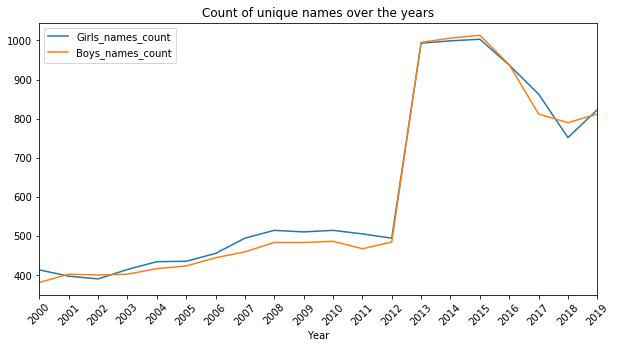

In [12]:
unique_names_count_df.plot(x='Year', xticks=years, rot=45, figsize=[10,5], 
                           title='Count of unique names over the years', legend=True)

plt.show()

We can clearly see from the chart that trends for both sexes follow similar trends and both soared between 2012 and 2013 thanks to the change in the law. Let's take a closer look at these two years: 

In [13]:
girls_names_2012 = set(girls_names.Name[girls_names.Year == 2012])
girls_names_2013 = set(girls_names.Name[girls_names.Year == 2013])

new_names_g = girls_names_2013.difference(girls_names_2012)

boys_names_2012 = set(boys_names.Name[boys_names.Year == 2012])
boys_names_2013 = set(boys_names.Name[boys_names.Year == 2013])

new_names_b = boys_names_2013.difference(boys_names_2012)

print(len(new_names_g), len(new_names_b))

509 523


There are 509 new names for girls and 523 new names for boys when compared to the year before. Some examples:

In [14]:
new_names_g = [name for name in new_names_g]
new_names_b = [name for name in new_names_b]
print(new_names_g[:20], new_names_b[:20])

['RACHELA', 'AMARACHI', 'JUNONA', 'ALEXA', 'AISZA', 'VERÓNICA', 'ZAINAB', 'KHADIJA', 'ROMI', 'SELMA', 'STEPHANIE', 'MARYNA', 'MERIEM', 'JENNY', 'ADELINA', 'LIANA', 'ELINA', 'SAFIA', 'HÉLÉNA', 'LEONIA'] ['FRANCIS', 'LAMINE', 'ARYAN', 'CHRIS', 'AYAN', 'GUSTAVO', 'MAURICIO', 'MYRON', 'MATS', 'SEMEN', 'JAMAL', 'EMMANUEL', 'AUGUSTINE', 'EYAL', 'LÉON', 'AMIN', 'TIGRAN', 'GREZEGORZ', 'ADONIS', 'KRISTOFFER']


All of these names are wither foreign or of untypical spelling, therefore hadn't been allowed before. Now let's what is the top10 and top50 of the most popular names in each year for the last 20 years.

Firstly, let's create a dicctionary for each year which will hold 10 and 50 most popular names for each sex:

In [15]:
girls_names_top_50_year = {}
girls_names_top_10_year = {}

boys_names_top_50_year = {}
boys_names_top_10_year = {}

girls_names.sort_values(by='Count', ascending=False)
boys_names.sort_values(by='Count', ascending=False)

for year in years:
    names_50_g = girls_names[['Name','Count']][girls_names.Year == year][:50]
    names_10_g = girls_names[['Name','Count']][girls_names.Year == year][:10]
    girls_names_top_50_year[year] = names_50_g.reset_index()
    girls_names_top_10_year[year] = names_10_g.reset_index()
    
    names_50_b = boys_names[['Name','Count']][boys_names.Year == year][:50]
    names_10_b = boys_names[['Name','Count']][boys_names.Year == year][:10]
    boys_names_top_50_year[year] = names_50_b.reset_index()
    boys_names_top_10_year[year] = names_10_b.reset_index()


Secondly, let's see whether some of these names repeat each year:

In [16]:
freq_50_g = {}
freq_10_g = {}

freq_50_b = {}
freq_10_b = {}

for year in girls_names_top_50_year.values(): 
    for name in year['Name']:  
        if name in freq_50_g:
            freq_50_g[name] += 1
        else: freq_50_g[name] = 1
            
for year in boys_names_top_50_year.values(): 
    for name in year['Name']:  
        if name in freq_50_b:
            freq_50_b[name] += 1
        else: freq_50_b[name] = 1

for year in girls_names_top_10_year.values(): 
    for name in year['Name']:  
        if name in freq_10_g:
            freq_10_g[name] += 1
        else: freq_10_g[name] = 1
            
for year in boys_names_top_10_year.values(): 
    for name in year['Name']:  
        if name in freq_10_b:
            freq_10_b[name] += 1
        else: freq_10_b[name] = 1

Let's check which names were most frequently used:

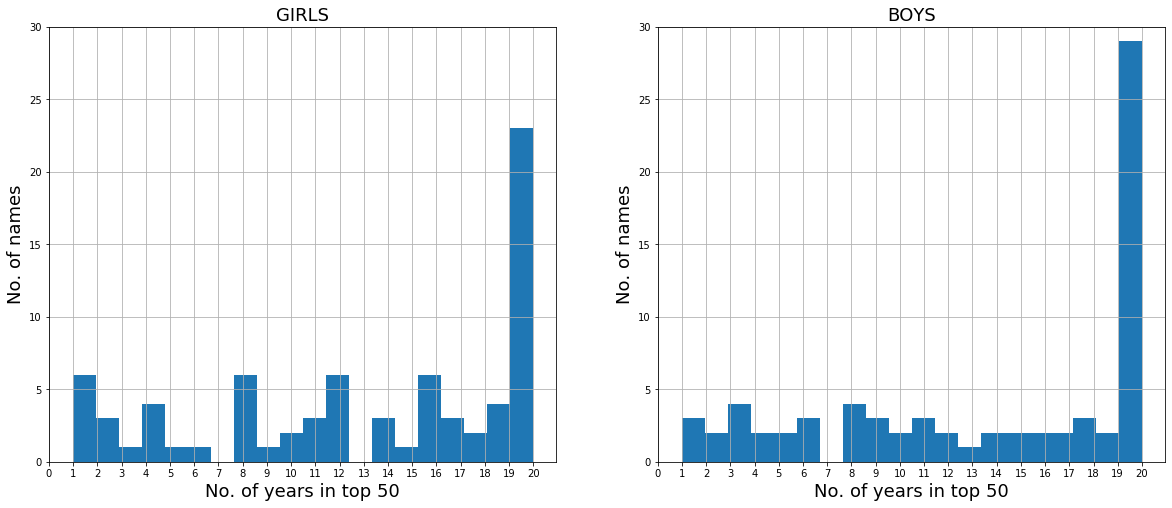

In [17]:
import numpy as np

freq_g_50_df = pd.DataFrame.from_dict(sorted(freq_50_g.values()))
freq_b_50_df = pd.DataFrame.from_dict(sorted(freq_50_b.values()))

fig, axes = plt.subplots(nrows=1, ncols=2, squeeze=False, figsize=(20,8))

ax = freq_g_50_df.plot(kind='hist',bins=20, xticks = np.arange(21), grid=True, ylim=(0,30), legend=False, ax = axes[0,0])
ax.set_xlabel("No. of years in top 50", fontsize=18)
ax.set_ylabel("No. of names", fontsize=18)
ax.set_title("GIRLS", fontsize=18)

ax1 = freq_b_50_df.plot(kind='hist',bins=20, xticks = np.arange(21), grid=True, ylim=(0,30), legend=False, ax = axes[0,1])
ax1.set_xlabel("No. of years in top 50", fontsize=18)
ax1.set_ylabel("No. of names", fontsize=18)
ax1.set_title("BOYS", fontsize=18)

plt.show()

From the histograms above we can see that there are 23 girls' names that have been in the top 50 for 20 consecutive year and 29 boys' names. There is a bigger diversity in the top 50 when it comes to female names, male names are more dominated by the top ones. Let's check which names didn't leave the top 50:

In [30]:
top_names_g = []
top_names_b = []

for name, count in freq_50_g.items():
    if count == 20:
        top_names_g.append(name)
        
for name, count in freq_50_b.items():
    if count == 20:
        top_names_b.append(name)
        
print(top_names_g, top_names_b)

['NATALIA', 'ALEKSANDRA', 'WIKTORIA', 'JULIA', 'WERONIKA', 'KAROLINA', 'ANNA', 'MAGDALENA', 'MARTYNA', 'ZUZANNA', 'OLIWIA', 'KINGA', 'AGATA', 'GABRIELA', 'ALICJA', 'MARIA', 'EMILIA', 'NIKOLA', 'MAJA', 'LAURA', 'MILENA', 'ZOFIA', 'JAGODA'] ['JAKUB', 'MATEUSZ', 'KACPER', 'MICHAŁ', 'PATRYK', 'DAWID', 'KAMIL', 'PIOTR', 'SZYMON', 'PAWEŁ', 'MACIEJ', 'BARTOSZ', 'DOMINIK', 'KRZYSZTOF', 'TOMASZ', 'FILIP', 'ADAM', 'BARTŁOMIEJ', 'KAROL', 'MIKOŁAJ', 'HUBERT', 'WOJCIECH', 'JAN', 'OSKAR', 'WIKTOR', 'ALEKSANDER', 'MARCEL', 'MAKSYMILIAN', 'MIŁOSZ']


Now let's see how the situation looks like in the top 10:

In [48]:
print("GIRLS:\n",len(list(freq_10_g.keys())))
print(sorted(list(freq_10_g.values())))

print("\nBOYS:\n", len(list(freq_10_b.keys())))
print(sorted(list(freq_10_b.values())))

GIRLS:
 21
[1, 2, 2, 3, 3, 5, 5, 6, 7, 7, 8, 10, 11, 12, 14, 15, 15, 17, 18, 19, 20]

BOYS:
 21
[1, 3, 4, 5, 5, 5, 6, 6, 6, 8, 9, 9, 9, 10, 12, 14, 14, 15, 19, 20, 20]


There are only 21 names for both sexes that entered the top10 at least once in 20 years. There is only 6 female names that stayed in the top10 for 15 or more years, and only 1 that didn't leave the top at all. There are only 4 male names with 15+ years in top 10, 2 of which stayed there for 20 years. This confirms that there is less diversity in naming boys.

Let's see the 15+ names:

In [52]:
top_10_names_over15_g = []
top_10_names_over15_b = []

for name, count in freq_10_g.items():
        if count >= 15:
            top_10_names_over15_g.append((count, name))

for name, count in freq_10_b.items():
        if count >= 15:
            top_10_names_over15_b.append((count, name))

print(top_10_names_over15_g, "\n\n",top_10_names_over15_b)   

[(17, 'NATALIA'), (18, 'ALEKSANDRA'), (15, 'WIKTORIA'), (20, 'JULIA'), (19, 'ZUZANNA'), (15, 'AMELIA')] 

 [(20, 'JAKUB'), (19, 'KACPER'), (15, 'MICHAŁ'), (20, 'SZYMON')]


Now let's see how is this reflected in the total number of children with each name from the top50.

Let's count total number of children given each name:

In [130]:
total_50_g = {}

for dic in girls_names_top_50_year.values():
    
    names = list(dic.Name)
    count = list(dic.Count)
    
    for i, name in enumerate(names):
        if name in total_50_g:
            total_50_g[name] += count[i]
        else: total_50_g[name] = count[i]

total_50_g_df = pd.DataFrame.from_dict(total_50_g.items()) 
total_50_g_df.columns = ['Name', 'Total']

total_50_b = {}

for dic in boys_names_top_50_year.values():
    
    names = list(dic.Name)
    count = list(dic.Count)
    
    for i, name in enumerate(names):
        if name in total_50_b:
            total_50_b[name] += count[i]
        else: total_50_b[name] = count[i]

total_50_b_df = pd.DataFrame.from_dict(total_50_b.items())  
total_50_b_df.columns = ['Name', 'Total']

print("Total girls with top50 name:", total_50_g_df.Total.sum(),"\nTotal girls:", total_girls, "\n% with different name:", round((total_girls-total_50_g_df.Total.sum())/total_girls,2))
print("Total boys with top50 name:", total_50_b_df.Total.sum(),"\nTotal boys:", total_boys, "\n% with different name:", round((total_boys-total_50_b_df.Total.sum())/total_boys,2))

print("\nAverage unique names yearly:\n",unique_names_count_df.drop(columns='Year').mean())

Total girls with top50 name: 3316730 
Total girls: 3923520 
% with different name: 0.15
Total boys with top50 name: 3521210 
Total boys: 4140784 
% with different name: 0.15

Average unique names yearly:
 Girls_names_count    617.60
Boys_names_count     605.45
dtype: float64


Each year there are on average more than 600 unique names given to children but as much as 85% comes from the 50 top ones. 

Now let's see graphical representation of the numbers:

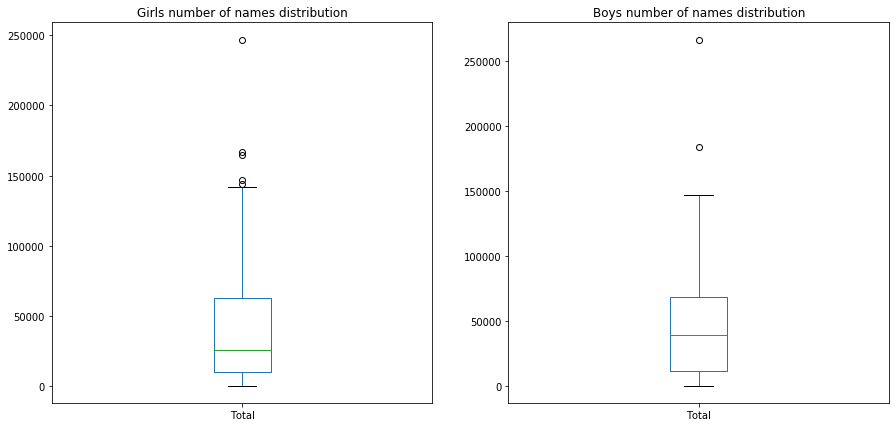

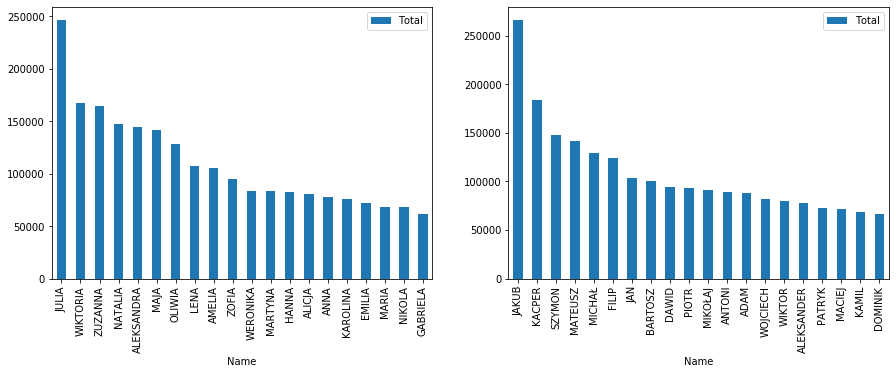

In [155]:
fig, axes = plt.subplots(1,2, figsize=(15,7))

total_50_g_df.plot.box(ax = axes[0], title = 'Girls number of names distribution')
total_50_b_df.plot.box(ax = axes[1], title = 'Boys number of names distribution')

fig, axes = plt.subplots(1,2, figsize=(15,5))
total_50_g_df.sort_values(by='Total', ascending=False)[:20].plot.bar(x='Name', ax = axes[0])
total_50_b_df.sort_values(by='Total', ascending=False)[:20].plot.bar(x='Name', ax = axes[1])

From the box plot we can see that the median number of children per name is much lower for girls than for boys. There are also more outliers within girls' names.

From the bar chart we can see than both follow similar trend of distribution - one names diminates significantly, second name has much lower numbers.

In [171]:
Julia = total_50_g_df.Total[total_50_g_df.Name == "JULIA"]
Jakub = total_50_b_df.Total[total_50_b_df.Name == "JAKUB"]

print(round(Julia / total_girls, 3))
print(round(Jakub / total_boys, 3))

3    0.063
Name: Total, dtype: float64
0    0.064
Name: Total, dtype: float64


The most popular names are Julia - for girls, and Jakub - for boys. Over the past 20 years around 6.5% of all children were given these 2 names.

As a final step, let's see year by year total number distribution of top 10 names:

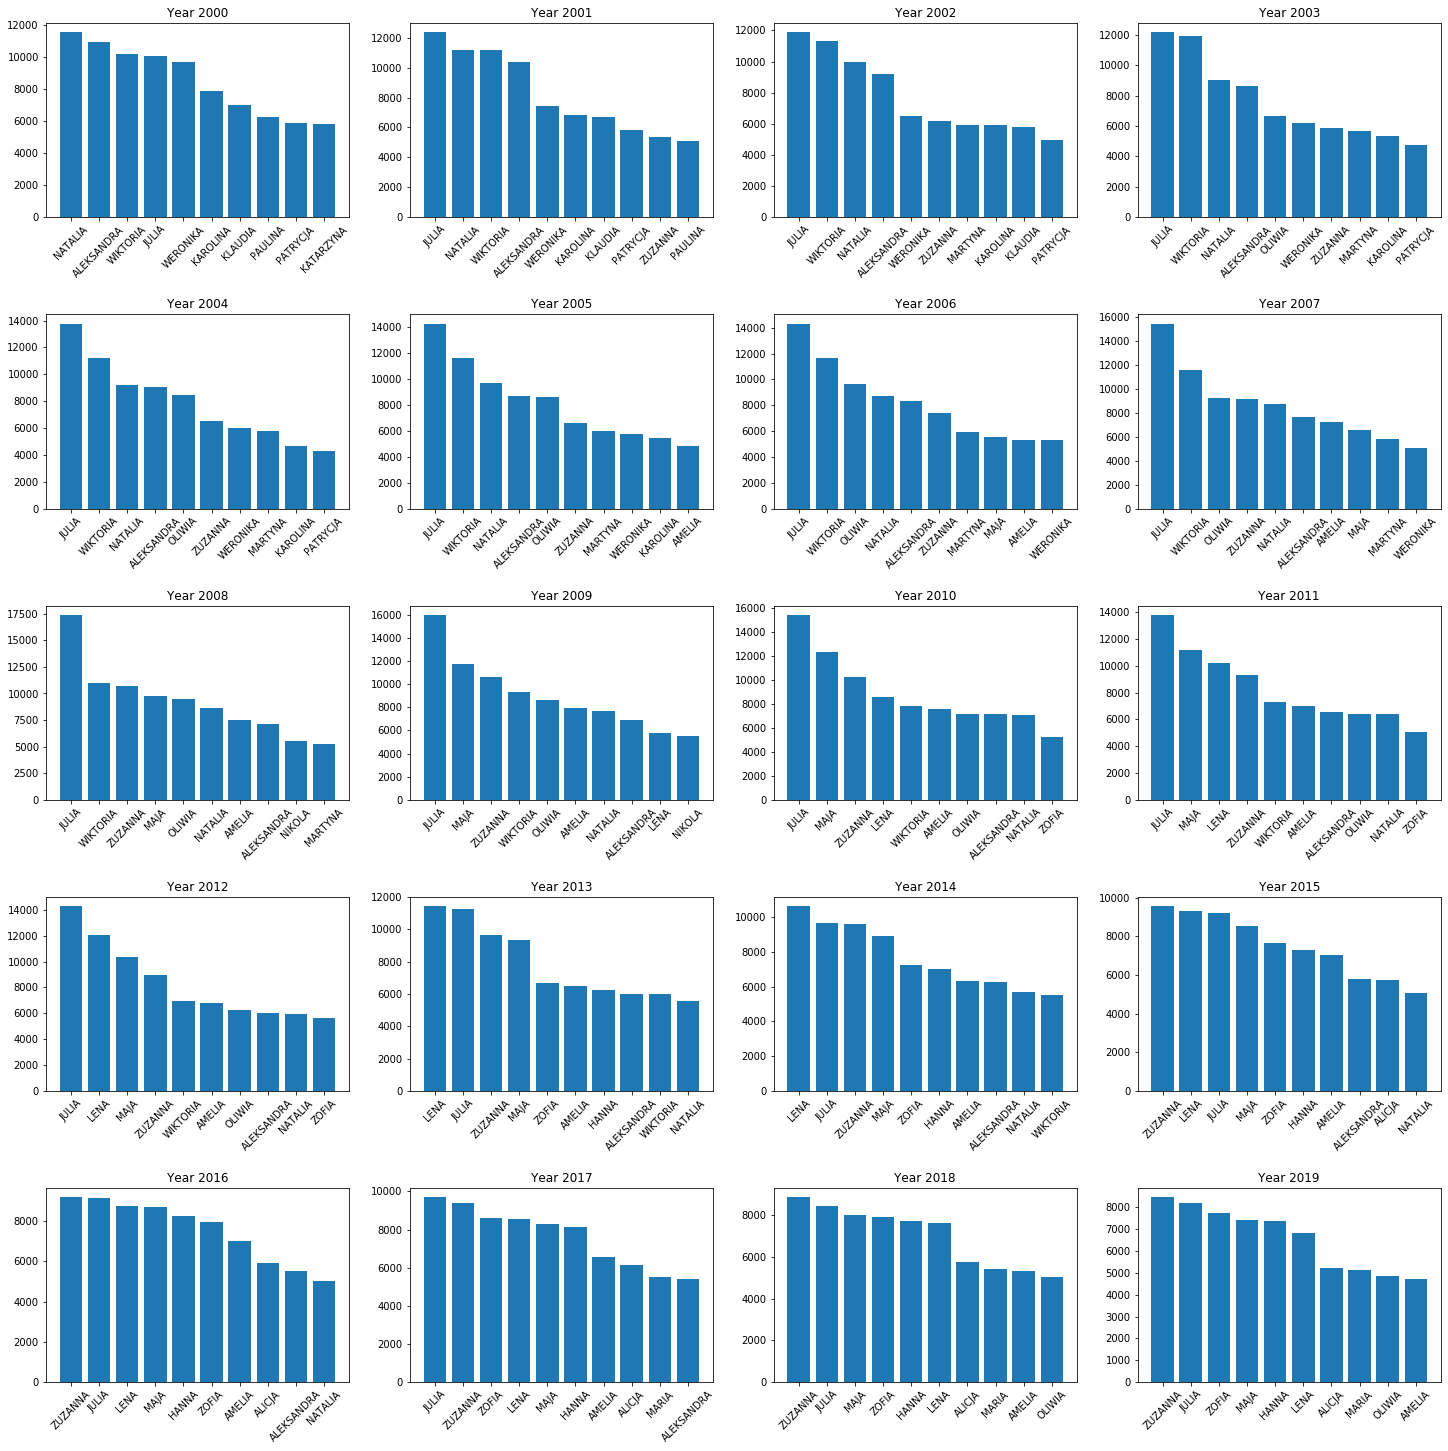

In [175]:
import numpy as np

fig, axes = plt.subplots(5, 4, figsize=(25,25))

plt.subplots_adjust(hspace=0.5)

shape = (5,4)
years_keys = np.reshape(years,shape)

for i in range(0,5):
    for j in range(0,4):
        df = girls_names_top_50_year[years_keys[i][j]]
        axes[i,j].bar(df.iloc[:10,1], df.iloc[:10,2])
        axes[i,j].set_title('Year ' + str(years_keys[i][j]))
        for tick in axes[i,j].get_xticklabels():
            tick.set_rotation(45)

plt.show()

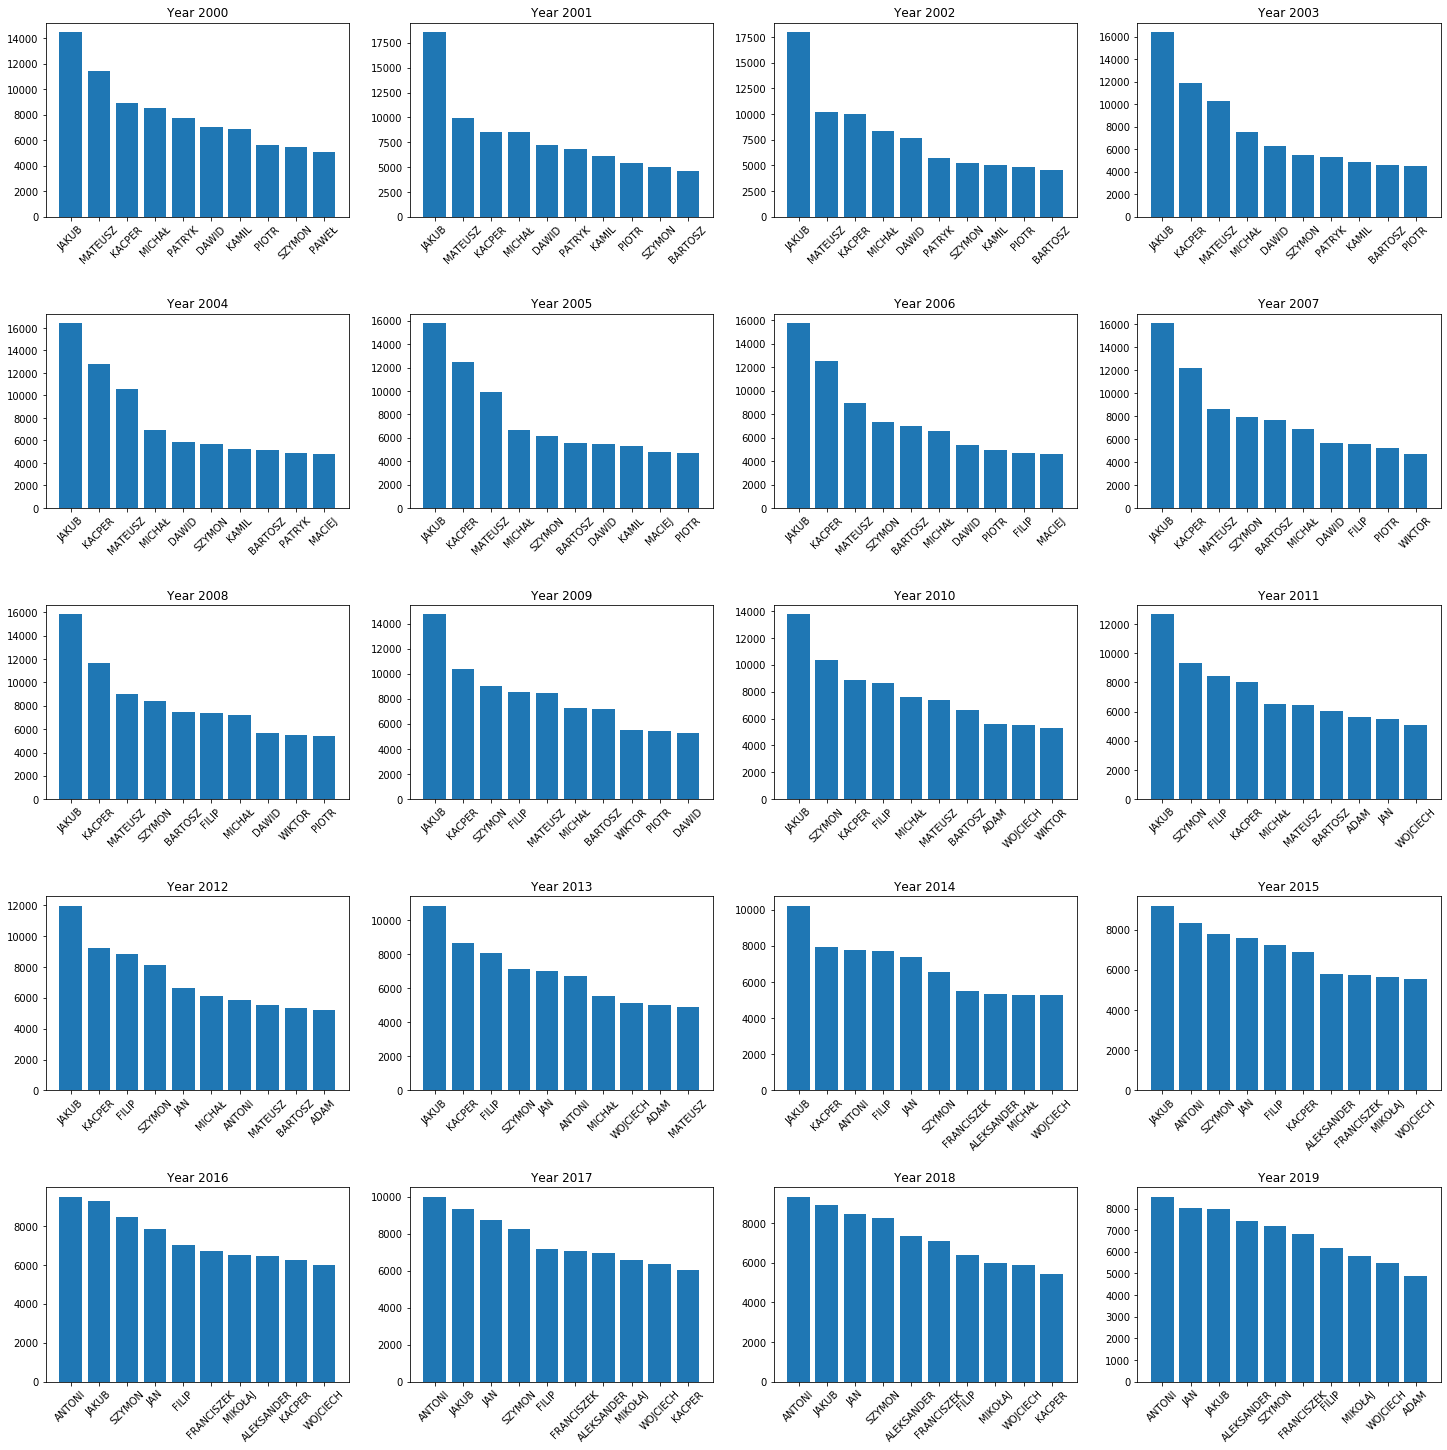

In [176]:
fig, axes = plt.subplots(5, 4, figsize=(25,25))

plt.subplots_adjust(hspace=0.5)

shape = (5,4)
years_keys = np.reshape(years,shape)

for i in range(0,5):
    for j in range(0,4):
        df = boys_names_top_50_year[years_keys[i][j]]
        axes[i,j].bar(df.iloc[:10,1], df.iloc[:10,2])
        axes[i,j].set_title('Year ' + str(years_keys[i][j]))
        for tick in axes[i,j].get_xticklabels():
            tick.set_rotation(45)

plt.show()